##Importacao e tratamento dos dados

In [103]:
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file = ZipFile('Arquivo.zip','r')
file.extractall()
file.close()

df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [104]:
renomear = {
    'gender' : 'sexo',
    'age' : 'idade',
    'hypertension': 'hipertensao',
    'heart_disease': 'doenca_cardiaca',
    'smoking_history': 'historico_fumante',
    'bmi':	          'imc',
    'HbA1c_level': 'nivel_glicemico',
    'blood_glucose_level': 'nivel_glicose_sangue',
    'diabetes': 'diabetes'
}
df.rename(columns=renomear, inplace=True)
df.head()

,sexo,idade,hipertensao,doenca_cardiaca,historico_fumante,imc,nivel_glicemico,nivel_glicose_sangue,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [105]:
df.describe()

,idade,hipertensao,doenca_cardiaca,imc,nivel_glicemico,nivel_glicose_sangue,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<ipython-input-106-48d40e801b5a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['imc'],norm_hist=False, kde=False )


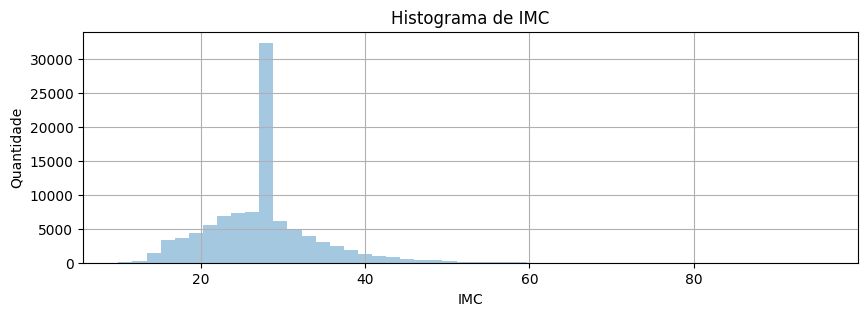

In [106]:
plt.figure(figsize=(10,3))
ax = sns.distplot(df['imc'],norm_hist=False, kde=False )
ax.set_title('Histograma de IMC')
ax.set(xlabel='IMC', ylabel='Quantidade')
ax.grid()

### Equalização dos dados

Text(0.5, 1.0, 'Quantidade de Pessoas com ou sem Diabetes')

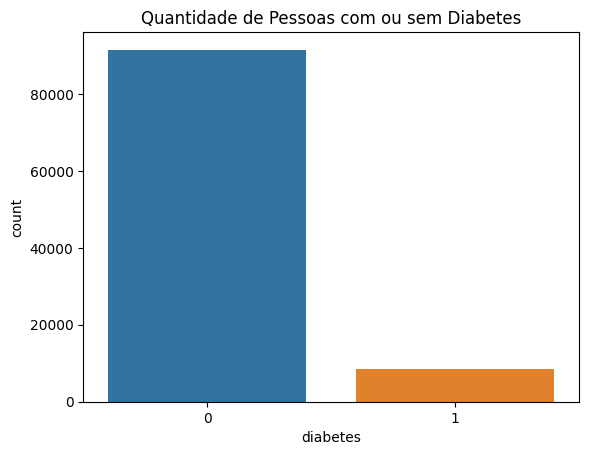

In [107]:
ax = sns.countplot(x='diabetes' , data=df)
ax.set_title('Quantidade de Pessoas com ou sem Diabetes')

In [108]:
#equilibrando os dados
from imblearn.over_sampling import SMOTE
import numpy as np

y = df['diabetes']
X = df.drop(columns=['diabetes','historico_fumante','sexo'])

SEED = 1234
np.random.RandomState(SEED)

smt = SMOTE()
X,y = smt.fit_resample(X,y)

dados = pd.concat([X,y], axis=1)

<ipython-input-109-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

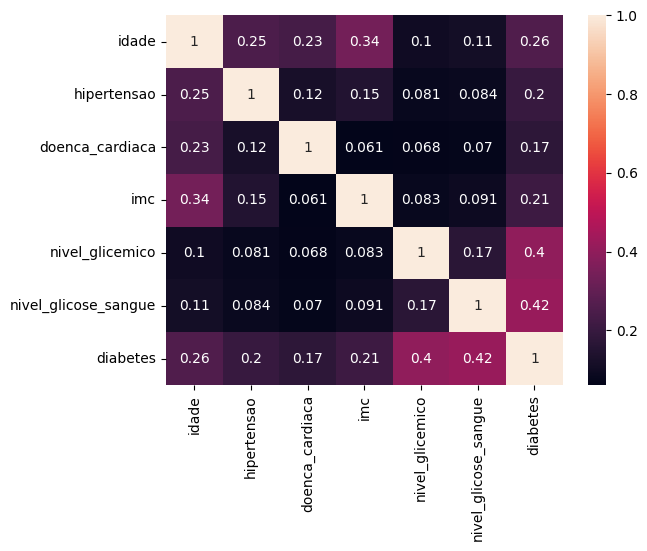

In [109]:
sns.heatmap(df.corr(), annot=True)

## Criação, treino e teste do modelo

O score do modelo é de: 91.0 
A acurracia do modelo é de: 91.0 


[Text(0.5, 23.52222222222222, 'Previsto'),
 Text(50.722222222222214, 0.5, 'Real')]

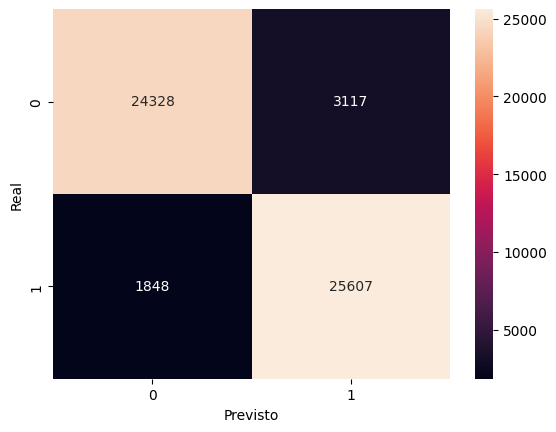

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

x = dados.drop(columns=['diabetes']) #,'historico_fumante','sexo'])
y = dados['diabetes']

seed = 1234
np.random.RandomState(seed)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

modelo_RFC = RandomForestClassifier(max_depth=5)
modelo_RFC.fit(x_train, y_train)
y_previsto = modelo_RFC.predict(x_test)
print('O score do modelo é de: {} ' .format(modelo_RFC.score(x_test, y_test).round(2)*100))
print('A acurracia do modelo é de: {} ' .format((accuracy_score(y_test,y_previsto)).round(2)*100))
matriz = confusion_matrix(y_test, y_previsto)
sns.heatmap(matriz, annot=True, fmt='d').set(xlabel='Previsto', ylabel='Real')

### Baseline dos dados

O score do modelo dummy é de: 50.0 
A acurracia do modelo dummy é de: 50.0 


[Text(0.5, 23.52222222222222, 'Previsto'),
 Text(50.722222222222214, 0.5, 'Real')]

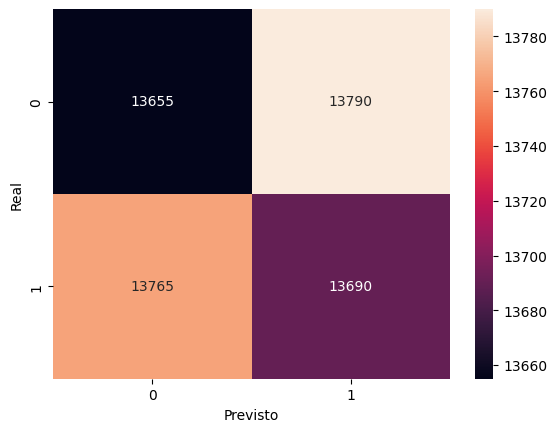

In [111]:
from sklearn.dummy import DummyClassifier

seed = 1234
np.random.RandomState(seed)


modelo_dummy = DummyClassifier(strategy='uniform')
modelo_dummy.fit(x_train, y_train)

y_previsto_dummy = modelo_dummy.predict(x_test)
print('O score do modelo dummy é de: {} ' .format(modelo_dummy.score(x_test, y_test).round(2)*100))
print('A acurracia do modelo dummy é de: {} ' .format((accuracy_score(y_test,y_previsto_dummy)).round(2)*100))
matriz_dummy = confusion_matrix(y_test, y_previsto_dummy)
sns.heatmap(matriz_dummy, annot=True, fmt='d').set(xlabel='Previsto', ylabel='Real')